# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load Dataset

In [2]:
lab_lbp_glrlm_tamura = pd.read_csv("./features/LAB_LBP_GLRLM_TAMURA.csv")
rgb_lbp_glrlm_tamura = pd.read_csv("./features/RGB_LBP_GLRLM_TAMURA.csv")
yuv_lbp_glrlm_tamura = pd.read_csv("./features/YUV_LBP_GLRLM_TAMURA.csv")

**lab_lbp_glrlm_tamura overview**

In [3]:
lab_lbp_glrlm_tamura.head()

image_id     mean_l    mean_a    mean_b      std_l      std_a      std_b  \
0     AAB1  19.194426  1.926654 -0.345757  37.200478   4.311089   1.376964   
1     AAC1  20.437208  5.984107  2.004153  34.598389  10.053769   3.626821   
2     AAD1  18.317097  4.204728  0.612767  34.764365   8.468268   1.989080   
3     AAE1  18.177835  1.388193  0.905047  36.666225   3.457686   2.449093   
4     AAF1  29.880487  1.530457  7.756884  41.805559   3.211993  11.499408   

     skew_l    skew_a    skew_b  ... LGLRE_deg135    HGL_deg135  \
0  1.448856  2.339195 -2.236062  ...     0.129932  30847.957950   
1  1.129681  1.245490  1.706738  ...     0.136085  22848.291860   
2  1.399964  1.817691  2.375555  ...     0.125393  27391.306758   
3  1.542756  2.808723  3.268905  ...     0.137174  32331.635905   
4  0.709869  1.509490  0.981021  ...     0.124495  29471.215765   

   SRLGLE_deg135  SRHGLE_deg135  LRLGLE_deg135  LRHGLE_deg135  \
0       0.095740   29275.474450            1.0   38531.902584   
1       0.093560   20476.685566            1.0   36270.822044   
2       0.087017   24898.288071            1.0   41547.122041   
3       0.095035   29001.686142            1.0   52129.372589   
4       0.089852   27236.932426            1.0   41421.801729   

   coarseness_tamura  contrast_tamura  directionality_tamura  roughness_tamura  
0           6.624458        71.046644             506.896717         77.671102  
1           8.710369        70.621195             631.417949         79.331565  
2           6.649460        66.846611             498.589908         73.496071  
3           8.335167        68.482548             546.900737         76.817715  
4           8.814541        94.239078             529.842877        103.053619  

[5 rows x 64 columns]

**rgb_lbp_glrlm_tamura overview**

In [4]:
rgb_lbp_glrlm_tamura.head()

image_id     mean_r     mean_g     mean_b       std_r       std_g  \
0     AAB1  52.045292  47.297070  49.225353   99.516999   91.817989   
1     AAC1  63.015335  46.658913  47.275543  105.317408   79.139329   
2     AAD1  54.091705  42.996166  44.820877  101.331340   81.946311   
3     AAE1  49.431889  45.006203  44.285549   98.744445   90.891439   
4     AAF1  83.735947  73.708206  60.540619  115.432290  103.295511   

       std_b    skew_r    skew_g    skew_b  ... LGLRE_deg135    HGL_deg135  \
0  95.370698  1.439013  1.460648  1.452620  ...     0.129932  30847.957950   
1  80.214550  1.127043  1.139841  1.140194  ...     0.136085  22848.291860   
2  85.225744  1.385205  1.426997  1.414738  ...     0.125393  27391.306758   
3  89.479803  1.533130  1.553299  1.557812  ...     0.137174  32331.635905   
4  85.172207  0.701907  0.719111  0.759498  ...     0.124495  29471.215765   

   SRLGLE_deg135  SRHGLE_deg135  LRLGLE_deg135  LRHGLE_deg135  \
0       0.095740   29275.474450            1.0   38531.902584   
1       0.093560   20476.685566            1.0   36270.822044   
2       0.087017   24898.288071            1.0   41547.122041   
3       0.095035   29001.686142            1.0   52129.372589   
4       0.089852   27236.932426            1.0   41421.801729   

   coarseness_tamura  contrast_tamura  directionality_tamura  roughness_tamura  
0           6.624458        71.046644             506.896717         77.671102  
1           8.710369        70.621195             631.417949         79.331565  
2           6.649460        66.846611             498.589908         73.496071  
3           8.335167        68.482548             546.900737         76.817715  
4           8.814541        94.239078             529.842877        103.053619  

[5 rows x 64 columns]

**yuv_lbp_glrlm_tamura overview**

In [5]:
yuv_lbp_glrlm_tamura.head()

image_id     mean_y    mean_u     mean_v       std_y      std_u      std_v  \
0     AAB1  48.936612  0.142743  12.572399   94.470594   1.111866  23.758623   
1     AAC1  51.619779 -2.135543  19.452645   87.021109   3.706781  32.248583   
2     AAD1  46.521749 -0.835470  15.605461   87.990465   2.110942  29.146788   
3     AAE1  46.247328 -0.964781  11.650972   93.023586   2.447296  23.111071   
4     AAF1  75.205396 -7.215146  19.591943  104.750389  10.596185  26.557075   

     skew_y    skew_u    skew_v  ... LGLRE_deg135    HGL_deg135  \
0  1.449754  1.243267  1.475613  ...     0.129932  30847.957950   
1  1.131753 -1.514278  1.141637  ...     0.136085  22848.291860   
2  1.401794 -2.361368  1.441680  ...     0.125393  27391.306758   
3  1.543808 -2.992016  1.568794  ...     0.137174  32331.635905   
4  0.711463 -0.965957  0.721977  ...     0.124495  29471.215765   

   SRLGLE_deg135  SRHGLE_deg135  LRLGLE_deg135  LRHGLE_deg135  \
0       0.095740   29275.474450            1.0   38531.902584   
1       0.093560   20476.685566            1.0   36270.822044   
2       0.087017   24898.288071            1.0   41547.122041   
3       0.095035   29001.686142            1.0   52129.372589   
4       0.089852   27236.932426            1.0   41421.801729   

   coarseness_tamura  contrast_tamura  directionality_tamura  roughness_tamura  
0           6.624458        71.046644             506.896717         77.671102  
1           8.710369        70.621195             631.417949         79.331565  
2           6.649460        66.846611             498.589908         73.496071  
3           8.335167        68.482548             546.900737         76.817715  
4           8.814541        94.239078             529.842877        103.053619  

[5 rows x 64 columns]

# Explore Color Moments Features

In [6]:
def select_color_feature_columns(df, prefixes, suffixes, label_col='label'):
    """    Selects columns from the DataFrame that match specified prefixes and suffixes.
    
    Parameters: 
        df (pd.DataFrame): The DataFrame containing the features.
        prefixes (list): List of prefixes to match.
        suffixes (list): List of suffixes to match.
        label_col (str): The name of the label column to include in the output.
    Returns:
        pd.DataFrame: A DataFrame containing only the selected feature columns and the label column.
    """
    
    # Create regex patterns for prefixes and suffixes
    prefix_pattern = '|'.join(prefixes)
    suffix_pattern = '|'.join(suffixes)
    regex_pattern = f'^({prefix_pattern})({suffix_pattern})$'
    
    # Select columns that match the regex pattern
    feature_cols = df.columns[df.columns.str.match(regex_pattern, na=False)].tolist()
    
    # Ensure the label column is included
    feature_cols.append(label_col)
    
    return df[feature_cols]


# Select features for LAB, YUV, and RGB color spaces
prefixes_lab = ['mean_', 'std_', 'skew_']
suffixes_lab = ['l', 'a', 'b']
lab_features = select_color_feature_columns(lab_lbp_glrlm_tamura, prefixes_lab, suffixes_lab)

prefixes_yuv = ['mean_', 'std_', 'skew_']
suffixes_yuv = ['y', 'u', 'v']
yuv_features = select_color_feature_columns(yuv_lbp_glrlm_tamura, prefixes_yuv, suffixes_yuv)

prefixes_rgb = ['mean_', 'std_', 'skew_']
suffixes_rgb = ['r', 'g', 'b']
rgb_features = select_color_feature_columns(rgb_lbp_glrlm_tamura, prefixes_rgb, suffixes_rgb)

In [7]:
def plot_feature_distributions(df, features, label_col='label', normal_label='normal', 
                               abnormal_label='abnormal', normal_color='green', 
                               abnormal_color='red', alpha=0.2, grid_cols=3, figsize=(15, 15)):
    """    Plot the distribution of features in a grid layout.
    
    Parameters:
        df (pd.DataFrame): The DataFrame containing the features and labels.
        features (list): List of feature names to plot.
        label_col (str): The name of the label column.  
        normal_label (str): The label for normal samples.
        abnormal_label (str): The label for abnormal samples.
        normal_color (str): Color for normal samples in the plot.
        abnormal_color (str): Color for abnormal samples in the plot.
        alpha (float): Transparency level for the plots.
        grid_cols (int): Number of columns in the grid layout.
        figsize (tuple): Size of the figure for the plots.
    """
    
    # calculate the number of rows needed for the grid
    num_features = len(features)
    grid_rows = math.ceil(num_features / grid_cols)
    
    fig, axes = plt.subplots(nrows=grid_rows, ncols=grid_cols, figsize=figsize)
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Loop through each feature and plot its distribution
    for i, feature in enumerate(features):
        ax = axes[i]
        
        # Filter normal and abnormal samples
        normal = df[df[label_col] == normal_label][feature]
        abnormal = df[df[label_col] == abnormal_label][feature]
        
        # Plot the distributions using seaborn
        sns.kdeplot(normal, fill=True, color=normal_color, alpha=alpha, label=normal_label.capitalize(), ax=ax)
        sns.kdeplot(abnormal, fill=True, color=abnormal_color, alpha=alpha, label=abnormal_label.capitalize(), ax=ax)
        
        # Set the title and labels for the subplot
        ax.set_title(f"Distribusi {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Density")
        ax.legend()
        
    # Hide any unused axes
    for j in range(num_features, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

## Lab Color Moments

### Plot Distributions

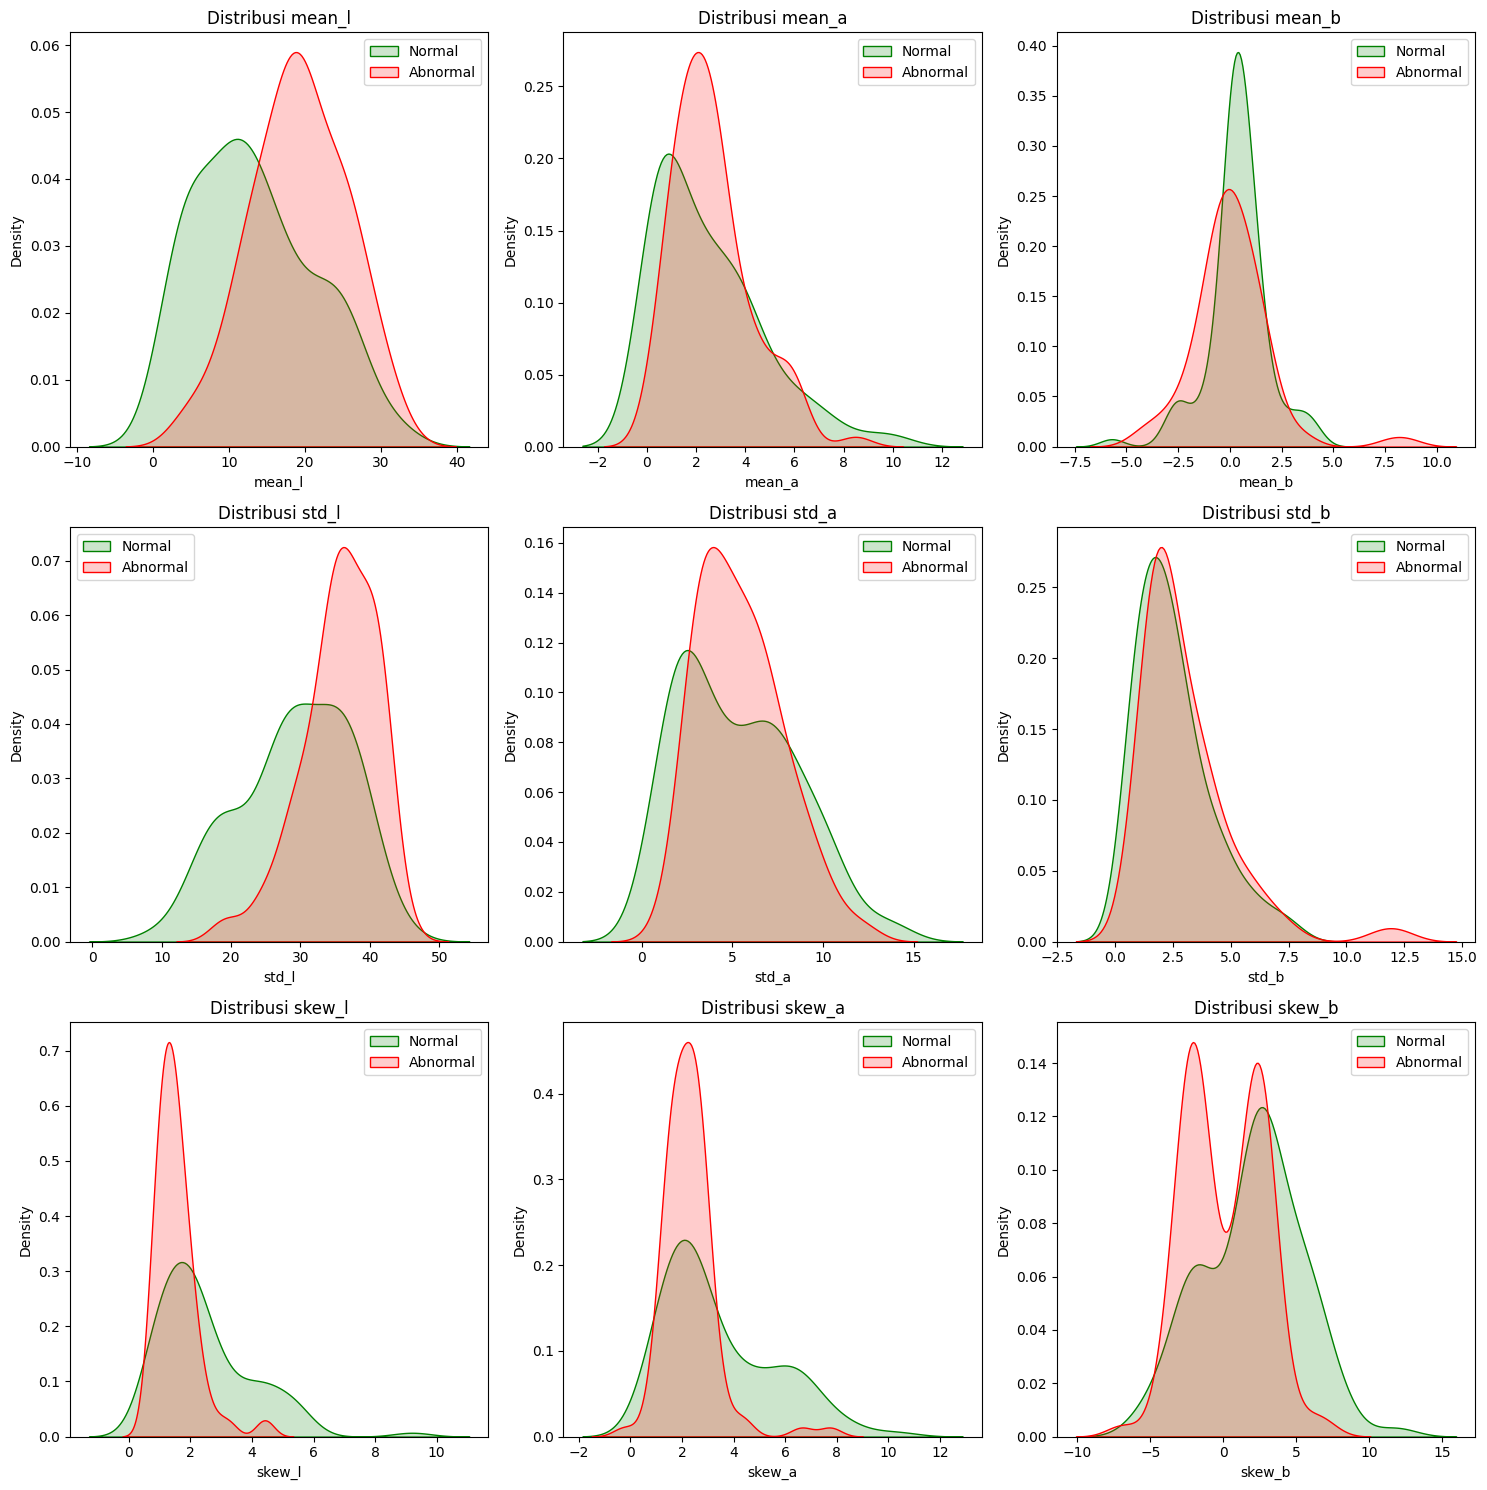

In [8]:
feature_list = [col for col in lab_features.columns if col != 'label']
plot_feature_distributions(lab_features, feature_list, grid_cols=3)

### Plot Pair Plots

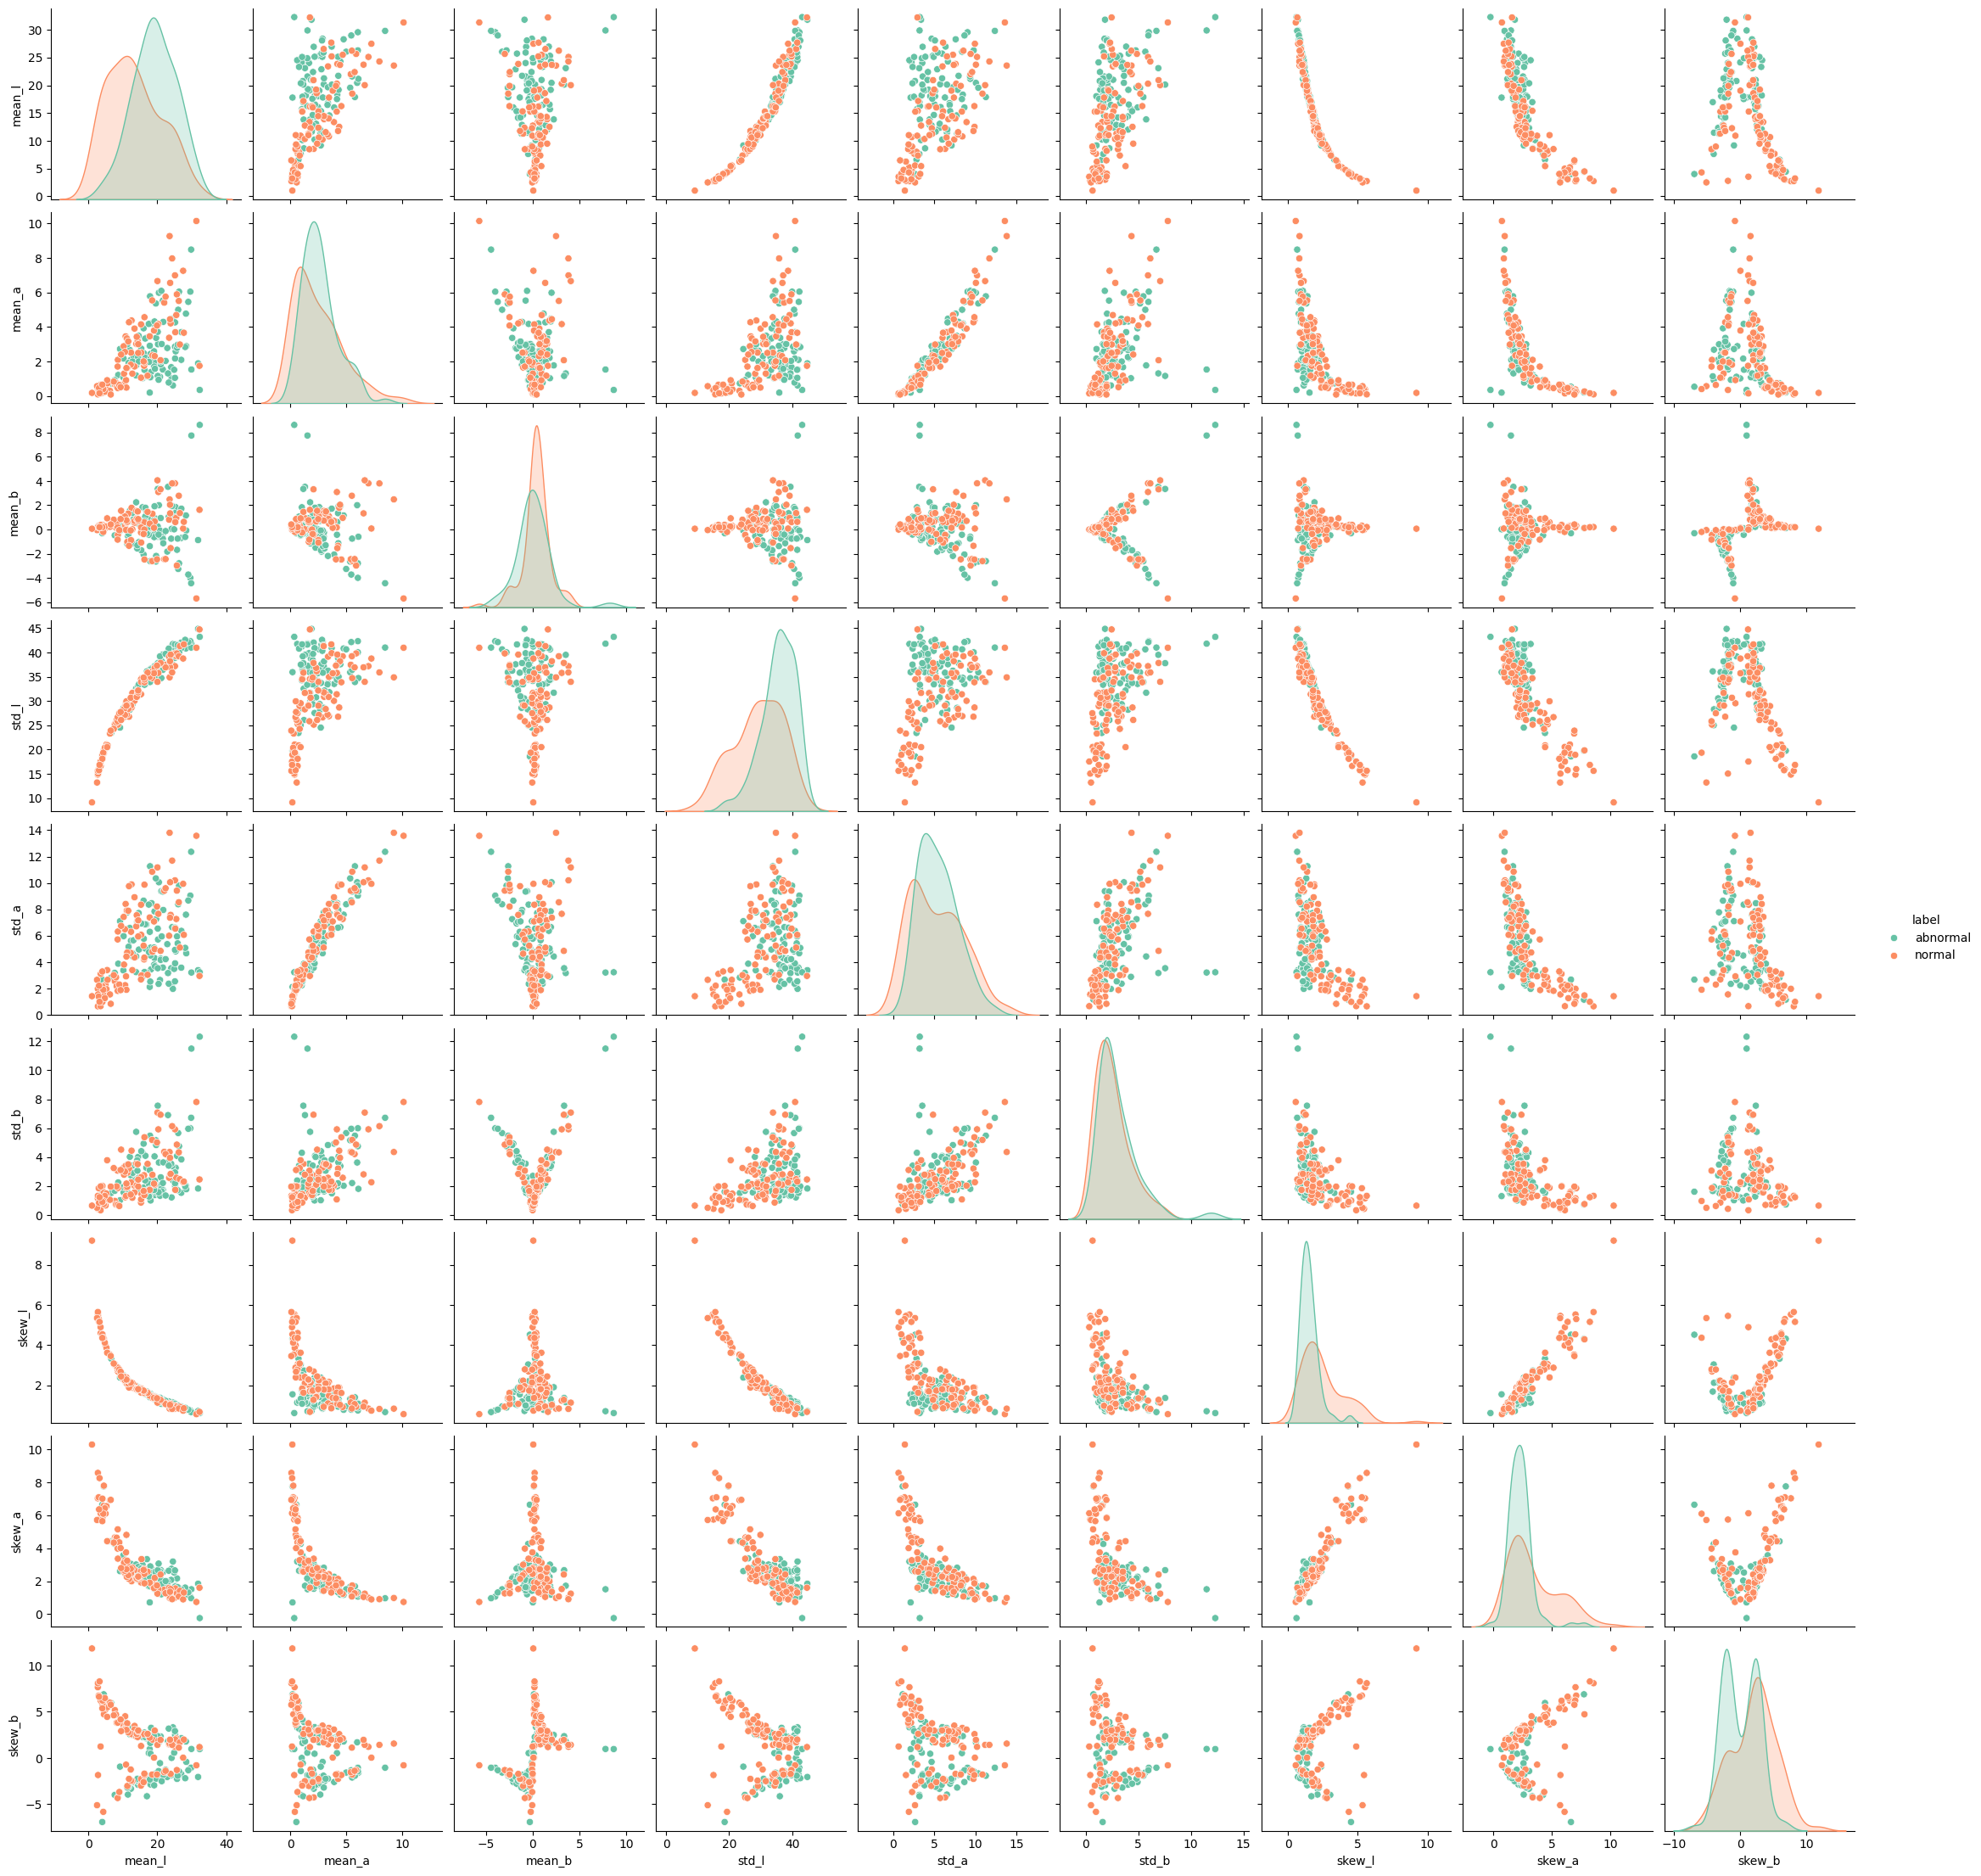

In [9]:
sns.pairplot(lab_features[feature_list + ['label']], hue='label', diag_kind='kde', palette='Set2')
plt.show()

## YUV Color Moments

### Plot Distributions

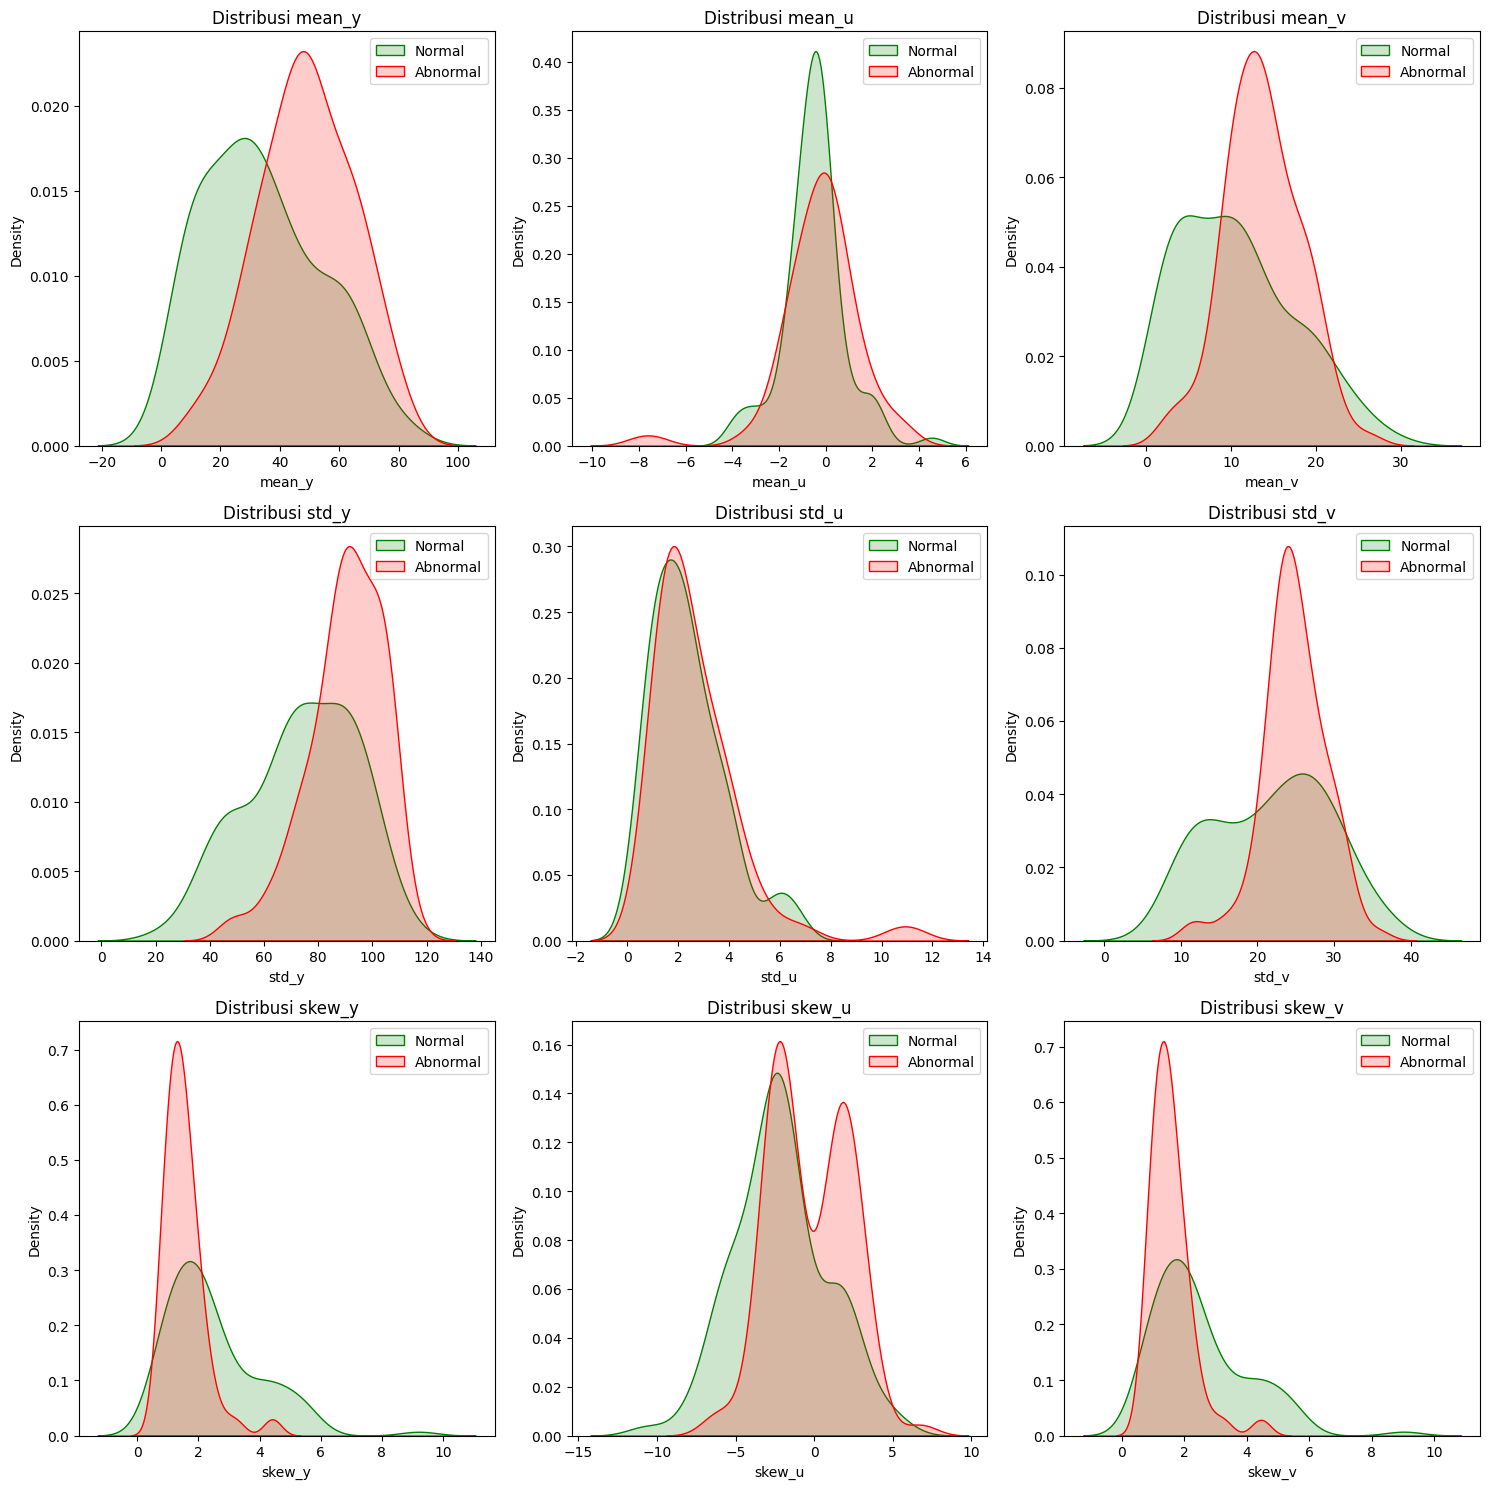

In [10]:
feature_list = [col for col in yuv_features.columns if col != 'label']
plot_feature_distributions(yuv_features, feature_list, grid_cols=3)

### Plot Pair Plots

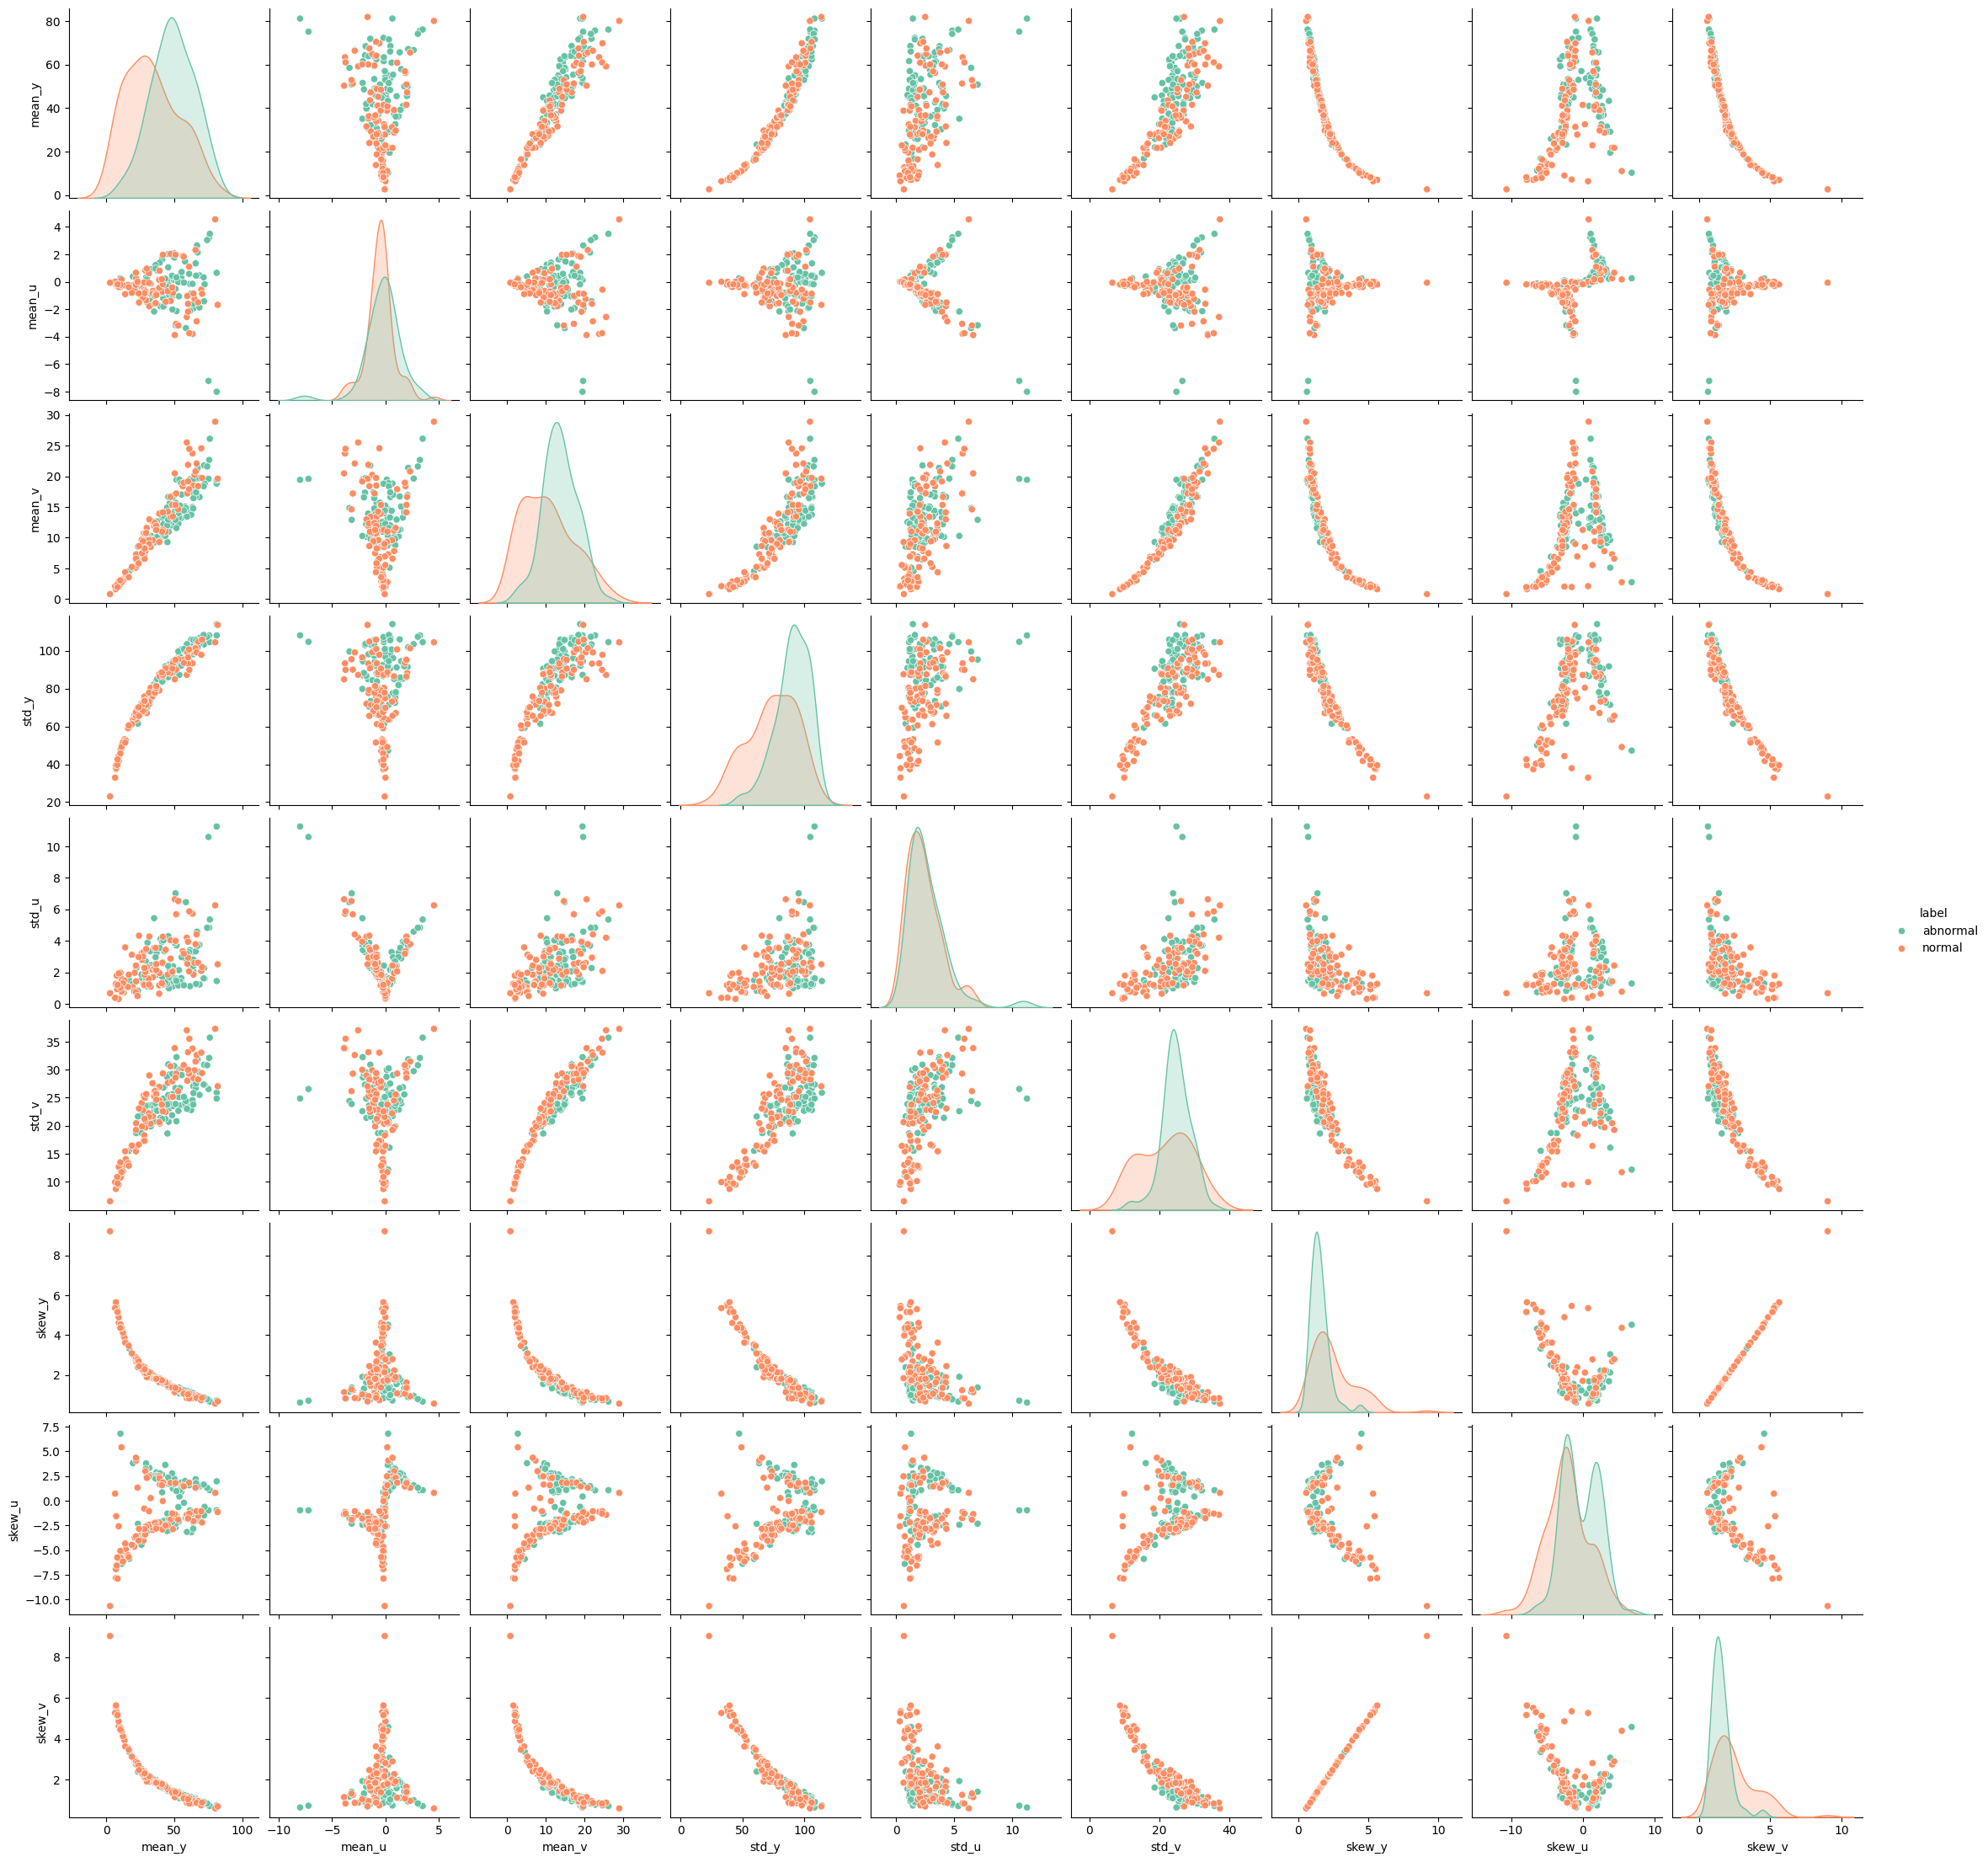

In [11]:
sns.pairplot(yuv_features[feature_list + ['label']], hue='label', diag_kind='kde', palette='Set2')
plt.show()

## RGB Color Moments

### Plot Distributions

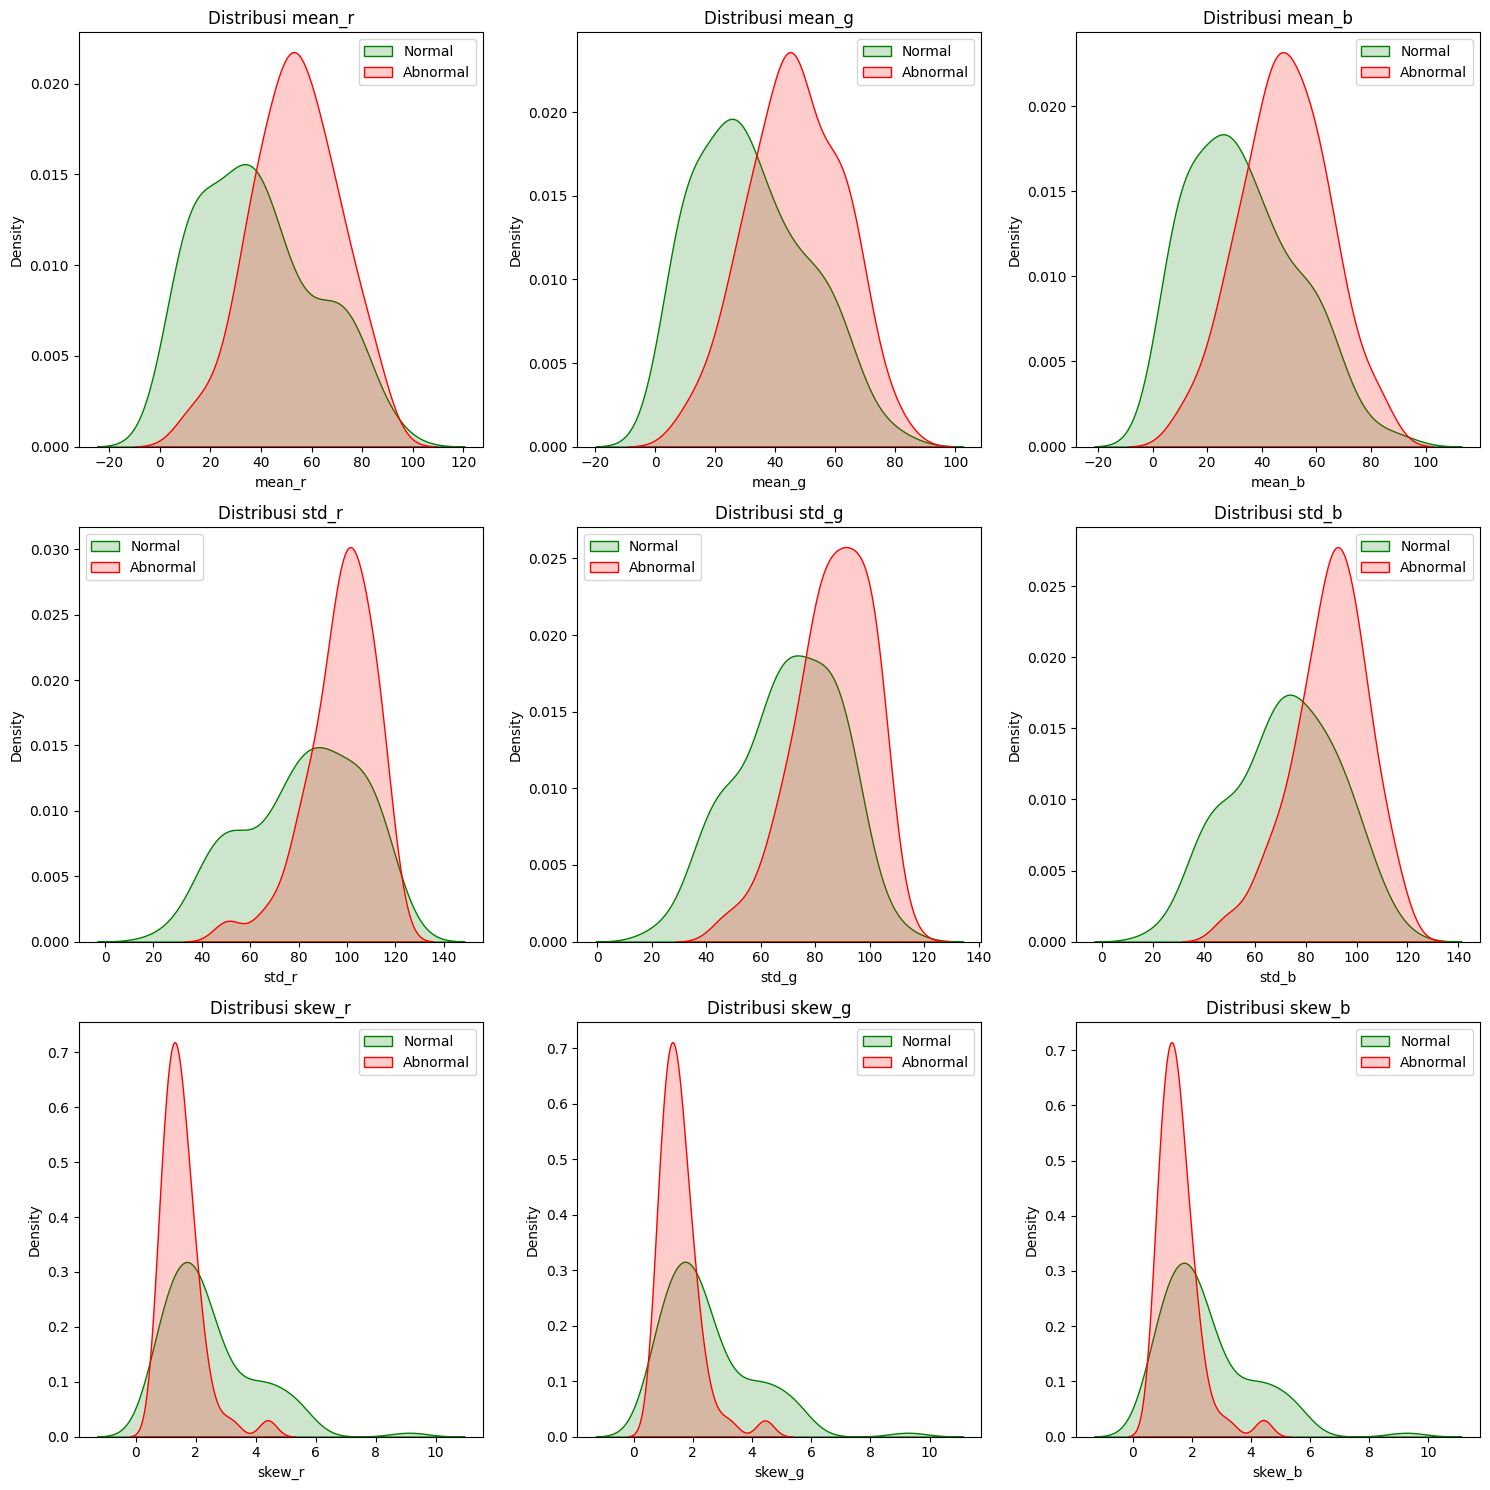

In [12]:
feature_list = [col for col in rgb_features.columns if col != 'label']
plot_feature_distributions(rgb_features, feature_list, grid_cols=3)

### Plot Pair Plots

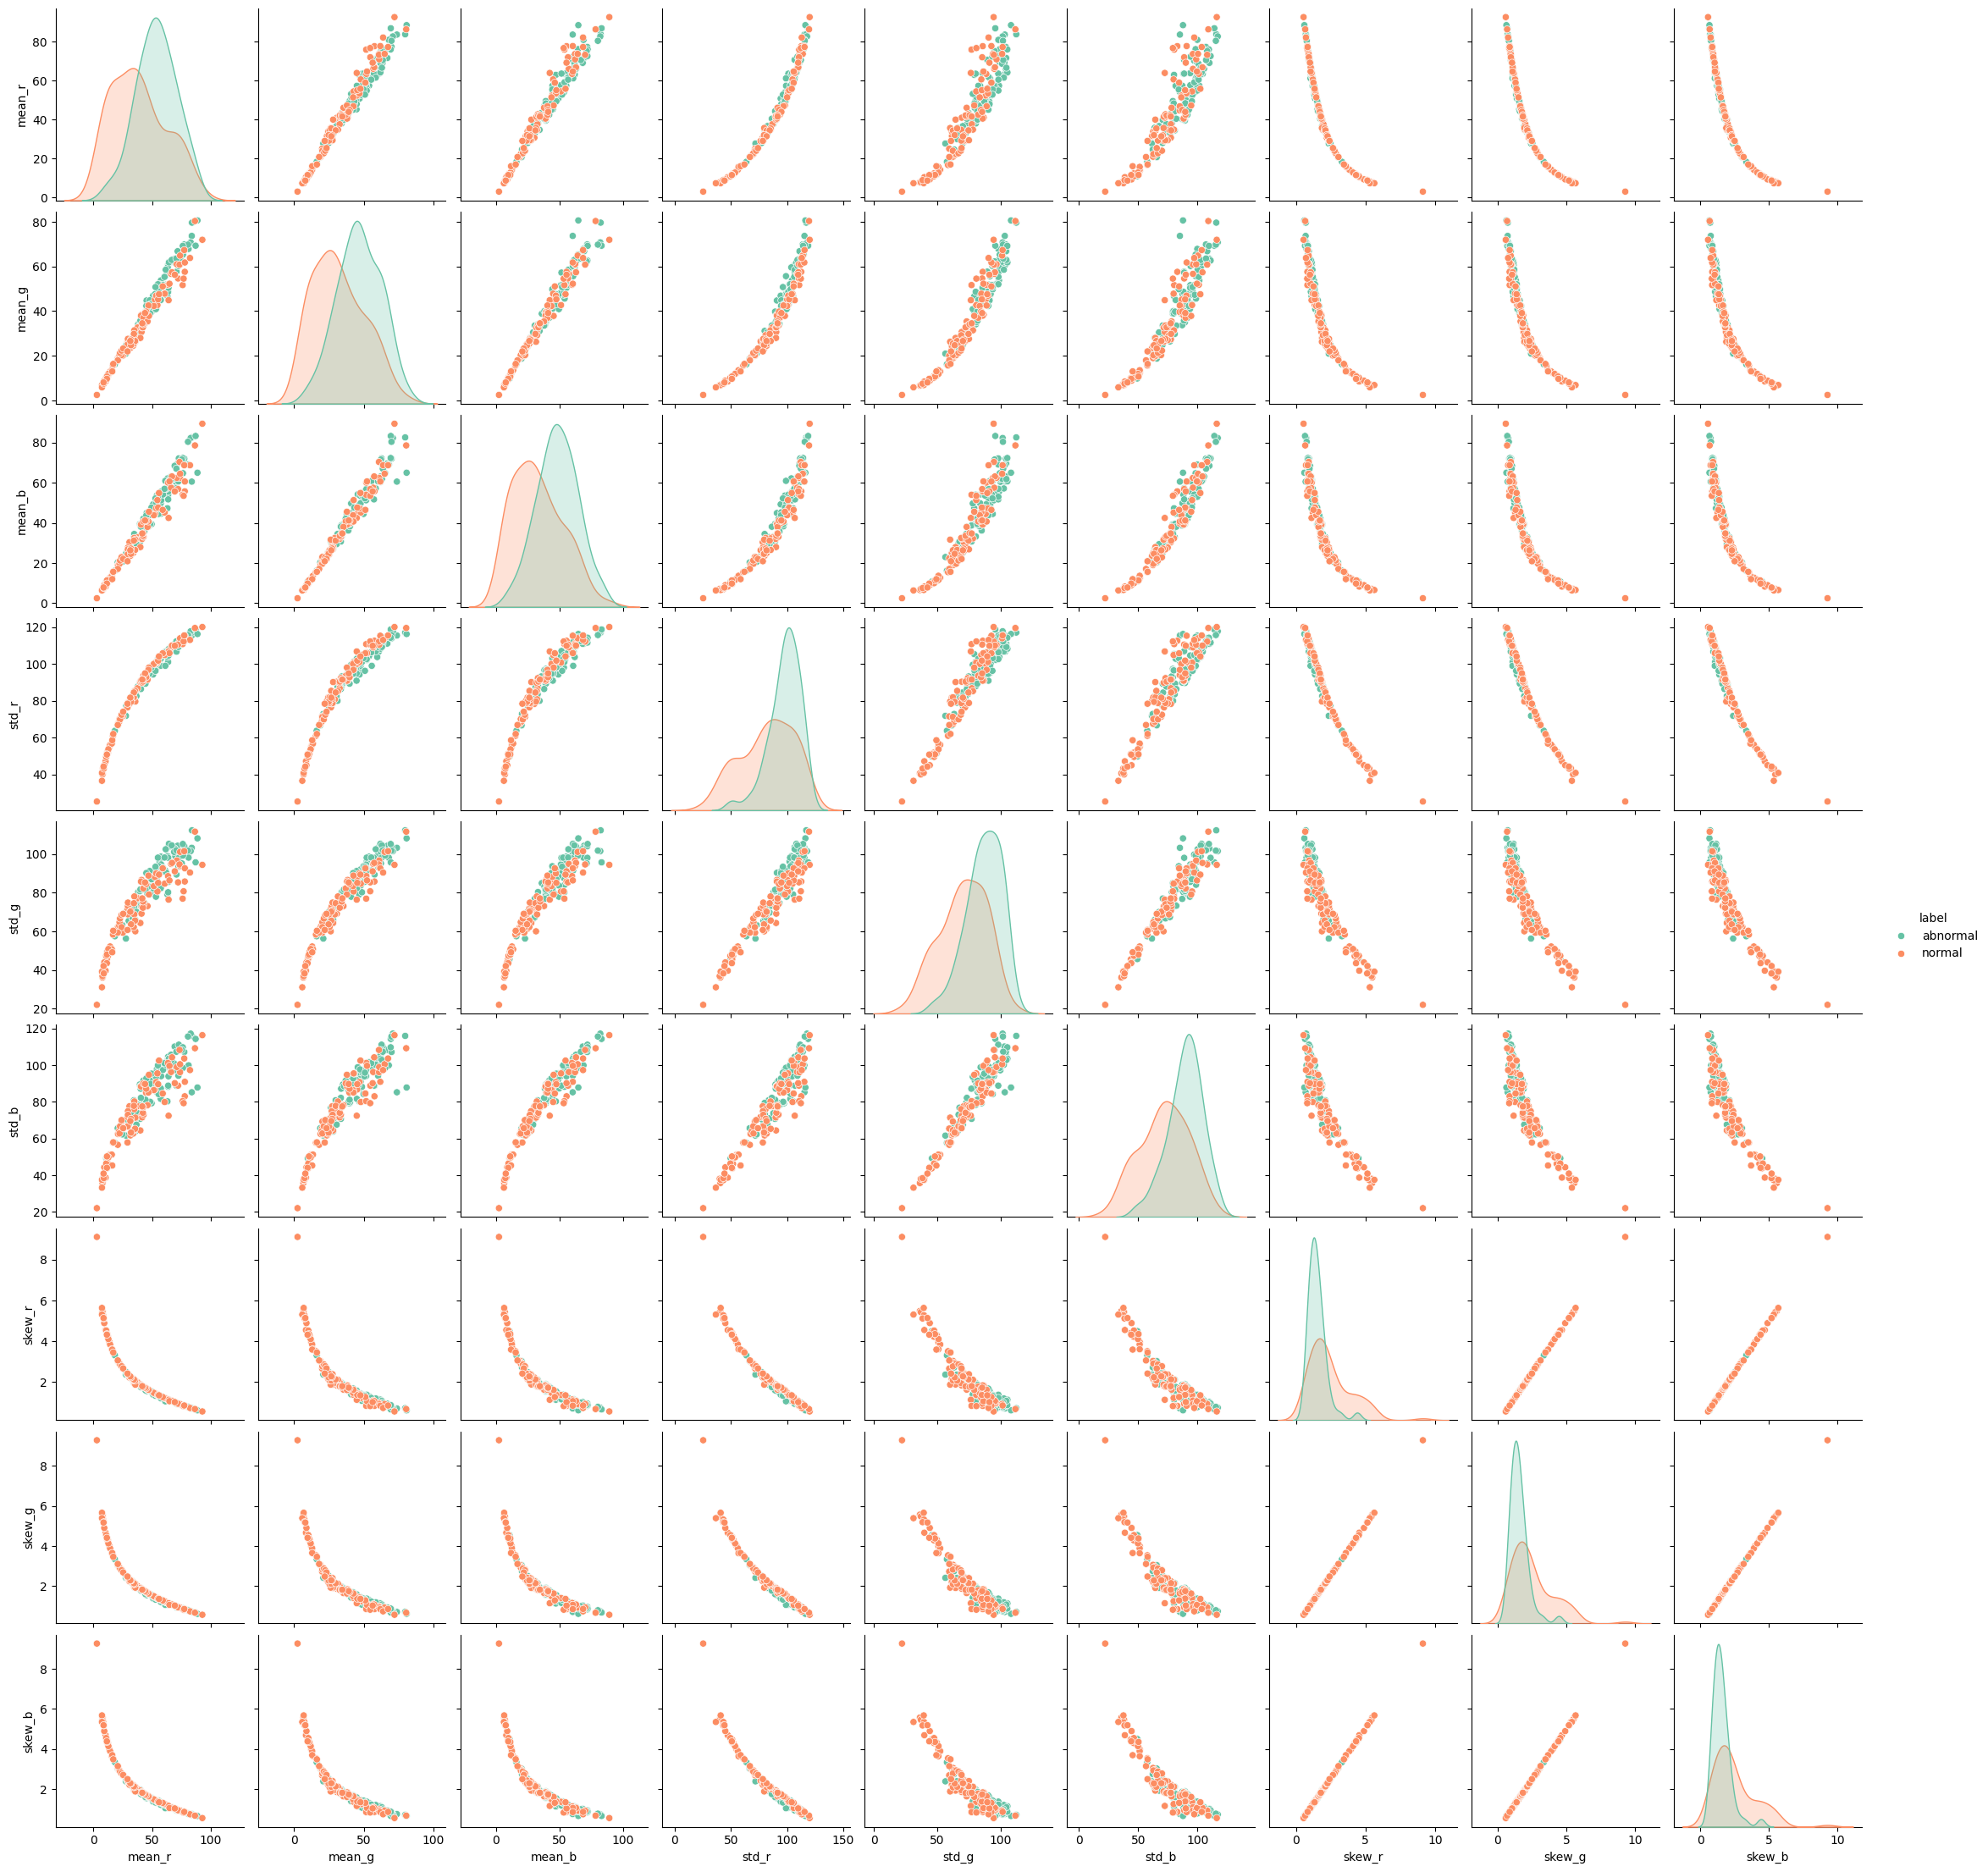

In [13]:
sns.pairplot(rgb_features[feature_list + ['label']], hue='label', diag_kind='kde', palette='Set2')
plt.show()